<a href="https://colab.research.google.com/github/KandamuruAdityamanoj/AI-ML-Internship-by-Tech-Mythree/blob/main/Task5_Mobile_Price_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/AI-ML Internship/Task 5/test.csv')

df = pd.read_csv('/content/drive/MyDrive/AI-ML Internship/Task 5/train.csv')

In [ ]:
print(df.head())  # Display the first few rows
print(df.info())  # Overview of columns and data types
print(df.describe())  # Summary statistics

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

Checking for null values

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

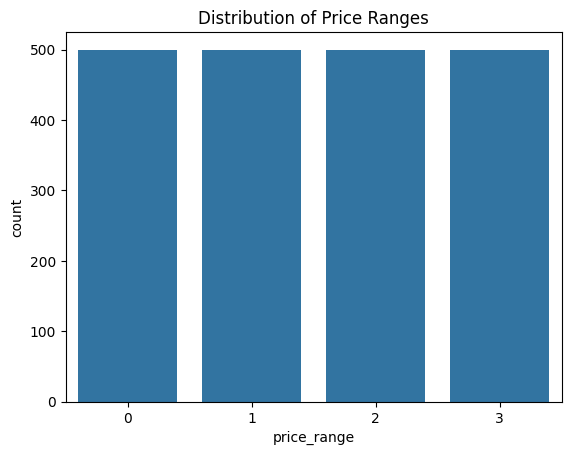

In [ ]:
# Visualize the distribution of target variable
sns.countplot(x='price_range', data=df)
plt.title('Distribution of Price Ranges')
plt.show()

<Axes: xlabel='price_range', ylabel='battery_power'>

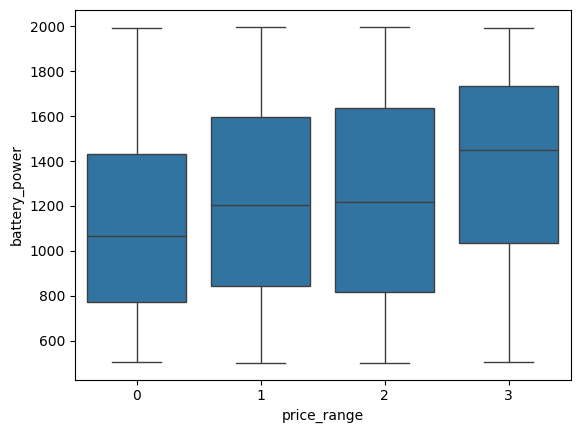

In [ ]:
sns.boxplot(x='price_range',y='battery_power',data=df)

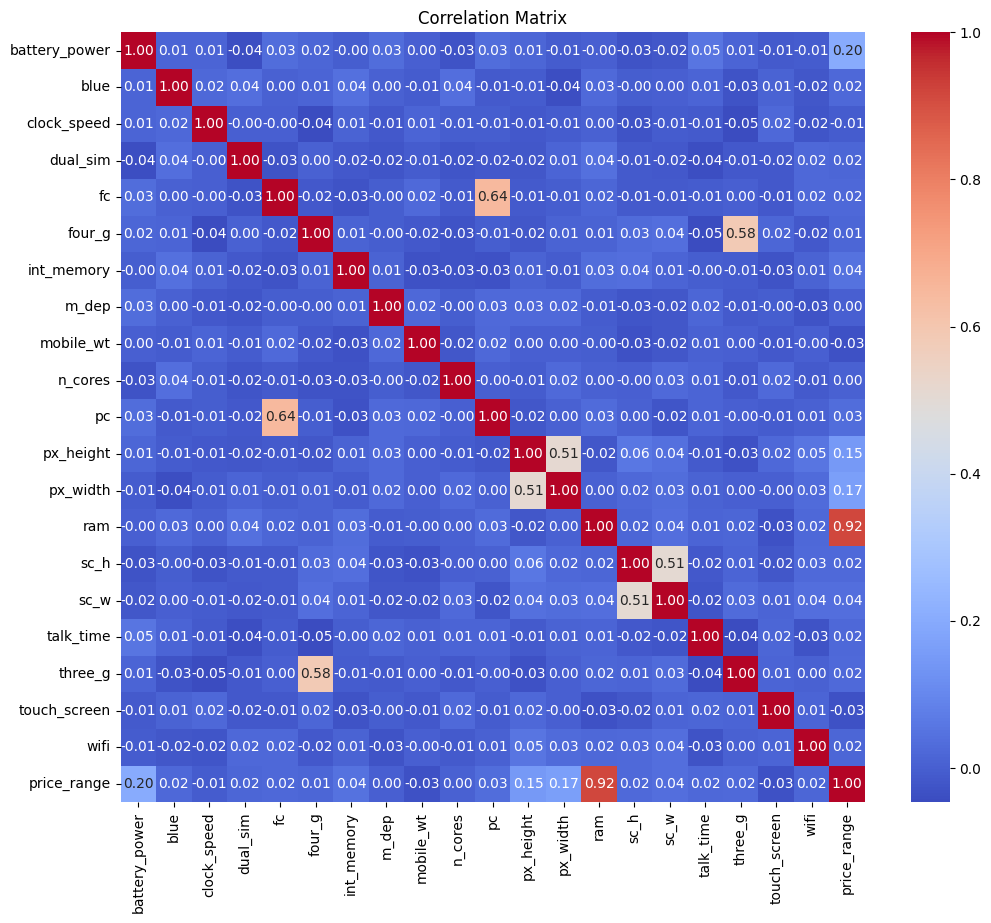

In [ ]:
# Visualize the correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('/content/drive/MyDrive/AI-ML Internship/Task 5/test.csv')

df = pd.read_csv('/content/drive/MyDrive/AI-ML Internship/Task 5/train.csv')

In [ ]:
X = df.drop('price_range', axis=1)
y = df['price_range']

# Split the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

# SVM Classifier

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

In [ ]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")

Decision Tree Accuracy: 0.84
SVM Accuracy: 0.96


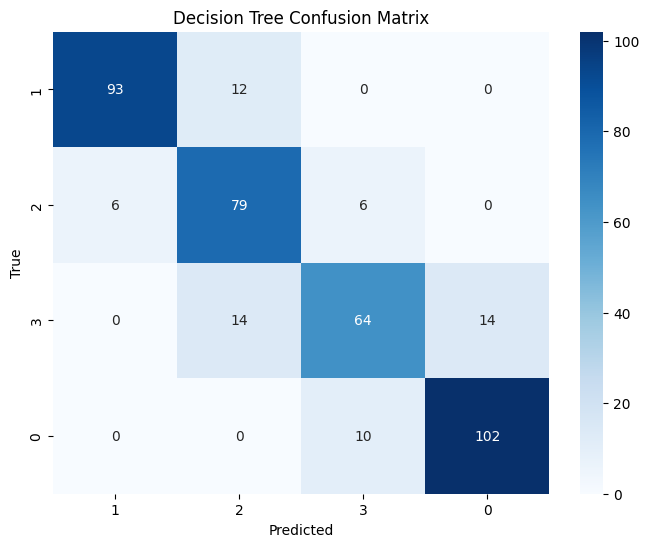

In [ ]:
# Plot Confusion Matrix for Decision Tree
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df['price_range'].unique(), yticklabels=df['price_range'].unique())
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

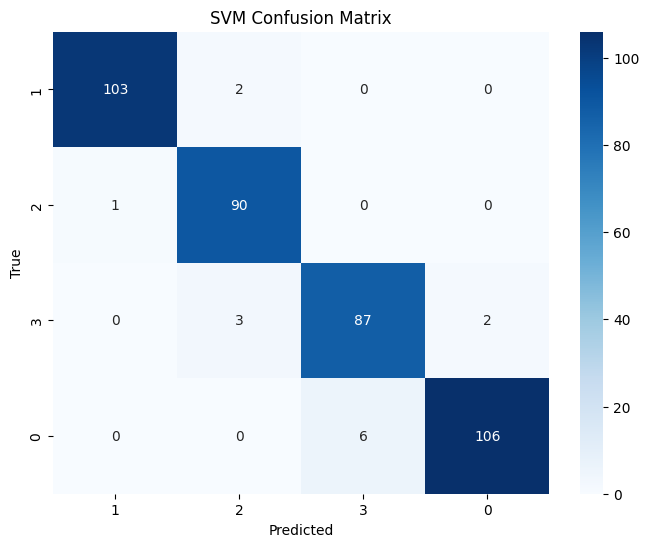

In [ ]:
# Plot Confusion Matrix for SVM
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df['price_range'].unique(), yticklabels=df['price_range'].unique())
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()